<a href="https://colab.research.google.com/github/DipeshYogi/Image-Classifier-using-KERAS/blob/master/keras_sneaks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [0]:
#The data set for this image classification was obtained by scraping image files from flipkart website.

df = np.load('drive/My Drive/CNN/sneaks/data.npy',allow_pickle=True)

In [0]:
df = pd.DataFrame(df)
df.rename(columns={0:'Img',1:'Label'}, inplace='True')
#shuffle DF
df = df.sample(frac=1).reset_index(drop=True)

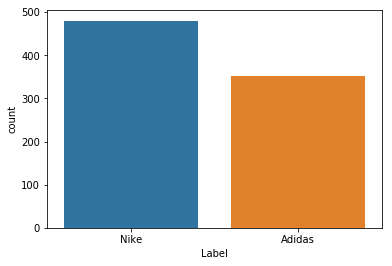

In [0]:
sns.countplot(x='Label', data=df)

In [0]:
#Label targets 
def label_img(img):
    if img == 'Nike':
        return [1,0]
    else:
        return [0,1]
      
df['Label'] = df['Label'].map(label_img)

###################################################################

CNN Model using KERAS with three Convolution layers


In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(32, kernel_size=5, activation='relu', input_shape=(120,120,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=1, padding='same'))

model.add(Conv2D(64, kernel_size=5,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=1, padding='same'))

model.add(Conv2D(128, kernel_size=5,activation='relu'))
model.add(Dropout(0.4))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

In [0]:
############################################################################################

In [0]:
#Optimizer used is Stochastic Gradient Descent
from keras.optimizers import SGD
opt = SGD(lr=1e-3)

In [0]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#############################################################################################

In [0]:
def get_data(df=df):
  #df = df.sample(frac=1).reset_index(drop=True)
  train = list(df.values)
  ##Train_data
  x = np.array([i[0] for i in train]).reshape(-1,120,120,1)
  y = np.array([i[1] for i in train])
  y = y.astype('float32')
  x = x.astype('float32')
  return x,y

x,y = get_data()

In [0]:
x = x/255

In [0]:
#Splitting training and test data

xtrain = x[:600]
ytrain = y[:600]

xtest = x[600:]
ytest = y[600:]

#######################################################################################################

Data augmentation using ImageDataGenerator to generate artificial image data with various changes in existing data like image rotation, zooming images etc


In [0]:
from keras.preprocessing.image import ImageDataGenerator

img_gen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

In [0]:
img_gen.fit(xtrain)

#########################################################

Training model


In [0]:
model.fit(xtrain, ytrain, batch_size=60, validation_data=(xtest, ytest), epochs=1500,verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 600 samples, validate on 232 samples
Epoch 1/1500





 - 15s - loss: 0.6940 - acc: 0.5733 - val_loss: 0.6773 - val_acc: 0.5647
Epoch 2/1500
 - 6s - loss: 0.6771 - acc: 0.5750 - val_loss: 0.6814 - val_acc: 0.5733
Epoch 3/1500
 - 6s - loss: 0.6749 - acc: 0.5867 - val_loss: 0.6735 - val_acc: 0.5862
Epoch 4/1500
 - 6s - loss: 0.6702 - acc: 0.5783 - val_loss: 0.6757 - val_acc: 0.5647
Epoch 5/1500
 - 6s - loss: 0.6860 - acc: 0.5717 - val_loss: 0.6663 - val_acc: 0.5647
Epoch 6/1500
 - 6s - loss: 0.6768 - acc: 0.5850 - val_loss: 0.6770 - val_acc: 0.5647
Epoch 7/1500
 - 6s - loss: 0.6548 - acc: 0.6150 - val_loss: 0.6784 - val_acc: 0.5647
Epoch 8/1500
 - 6s - loss: 0.6723 - acc: 0.5767 - val_loss: 0.6750 - val_acc: 0.5647
Epoch 9/1500
 - 6s - loss: 0.6677 - acc: 0.5983 - val_loss: 0.6594 - val_acc: 0.5690
Epoch 10/1500
 - 6s - loss: 0.6550 - acc: 0.6017 - val_loss: 0.6564 - val_acc: 0.6897


In [0]:
scores = model.evaluate(xtrain, ytrain)
scores_t = model.evaluate(xtest, ytest)

232/232 [==============================] - 1s 3ms/step


In [0]:
#Model Results

print ('Train Accuracy: {}%'.format(scores[1]*100))
print ('Test Accuracy: {}%'.format(scores_t[1]*100))

Train Accuracy: 100.0%
Test Accuracy: 82.75862068965517%


######################################################

Random Testing on Test Data on which the model was not trained.

In [0]:
i = 677

In [0]:
test_label = y[i:i+4]

In [0]:
test_label = test_label.astype(int)
test_label

array([[0, 1],
       [1, 0],
       [0, 1],
       [0, 1]])

In [0]:
y_pred = model.predict(x[i:i+4])

In [0]:
op =[]
for j in y_pred:
  if j[0] < j[1]:
    op.append([0,1])
  else:
    op.append([1,0])
op     

[[0, 1], [1, 0], [1, 0], [0, 1]]

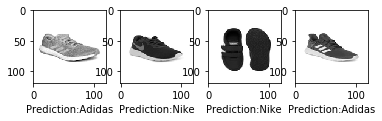

In [0]:
plt.subplot(1,4,1)

plt.imshow(x[i].reshape(120,120), cmap='gray')

if op[0] == [1,0]:
  plt.xlabel('Prediction:Nike')
else:
  plt.xlabel('Prediction:Adidas')
  
  

plt.subplot(1,4,2)
            
plt.imshow(x[i+1].reshape(120,120), cmap='gray')
            
if op[1] == [1,0]:
  plt.xlabel('Prediction:Nike')
else:
  plt.xlabel('Prediction:Adidas')
            
                     
           
 
plt.subplot(1,4,3)
            
plt.imshow(x[i+2].reshape(120,120), cmap='gray')
            
if op[2] == [1,0]:
  plt.xlabel('Prediction:Nike')
else:
  plt.xlabel('Prediction:Adidas')
    
            
            

plt.subplot(1,4,4)
plt.imshow(x[i+3].reshape(120,120), cmap='gray')
if op[3] == [1,0]:
  plt.xlabel('Prediction:Nike')
else:
  plt.xlabel('Prediction:Adidas')
            


In [0]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

##################################################################

CONCLUSION:

After various optimization the maximum accuracy score on test data was 82.75%.

It was observed that the model performs very well when predicting the train data again. However the model is not able to perform as well with test data.

After seeing the above results I concluded that the model is able to perform well when test images have logo of their brands on the shoe.
The model gives incorrect predictions in case where the test image has no distinct logo/tags, which would also be difficult for a human to predict by just lookng at the shape and colour of the shoe.
